In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

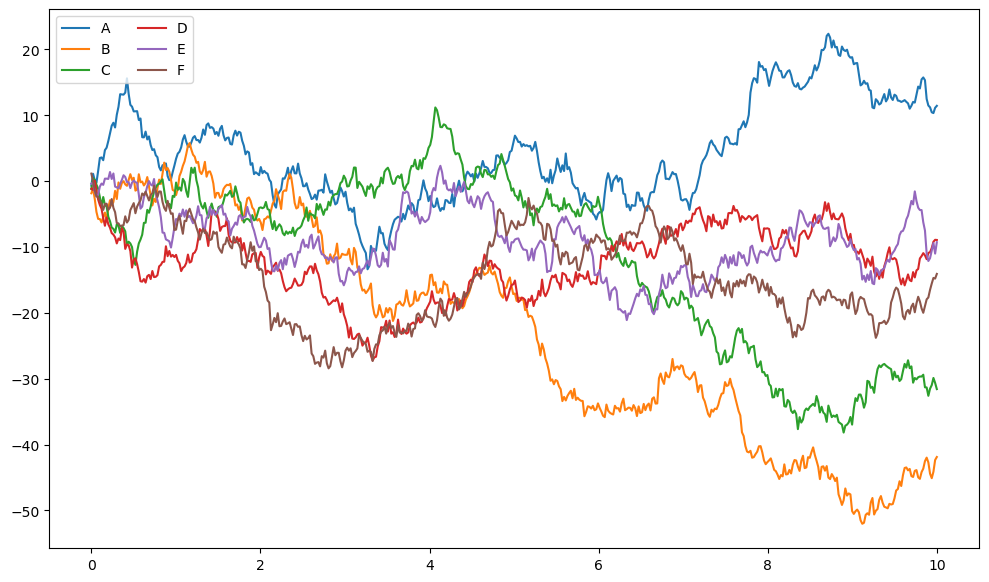

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-04-21 20:51:16.190103')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-04-21 21:00:00,27276,27400,27181,27272,103.164202,2.817450e+06
2023-04-21 22:00:00,27256,27374,27229,27277,42.357419,1.156799e+06
2023-04-21 23:00:00,27262,27343,27140,27260,96.376718,2.623386e+06
2023-04-22 00:00:00,27257,27338,27232,27254,21.728646,5.930201e+05
2023-04-22 01:00:00,27253,27323,27208,27223,9.151098,2.495055e+05


<Axes: xlabel='CloseTime'>

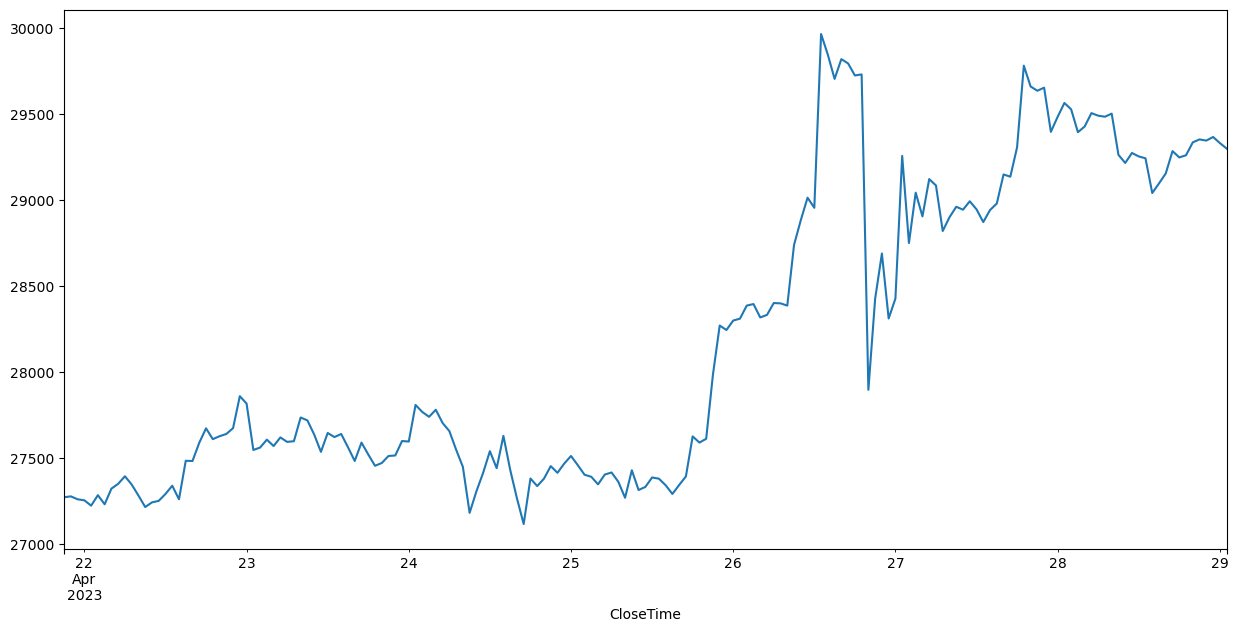

In [10]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-04-21 21:00:00,1842.4,1848.8,1826.0,1837.7,1139.902023,2.097807e+06
2023-04-21 22:00:00,1837.3,1851.0,1831.8,1840.3,304.675036,5.611725e+05
2023-04-21 23:00:00,1841.1,1847.7,1833.7,1844.9,183.315236,3.374620e+05
2023-04-22 00:00:00,1845.0,1854.4,1844.2,1848.4,99.284117,1.835787e+05
2023-04-22 01:00:00,1848.4,1853.1,1846.0,1846.8,62.603644,1.157505e+05


<Axes: xlabel='CloseTime'>

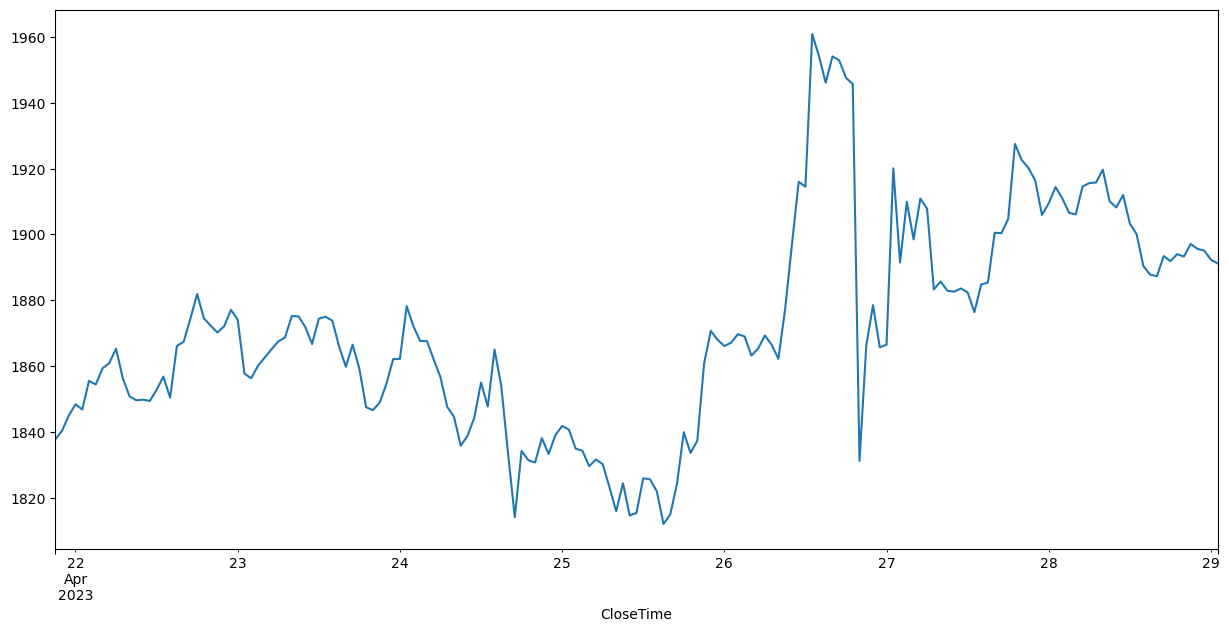

In [12]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-04-21 21:00:00,1842.4,1848.8,1826.0,1837.7,1139.902023,2.097807e+06
2023-04-21 22:00:00,1837.3,1851.0,1831.8,1840.3,304.675036,5.611725e+05
2023-04-21 23:00:00,1841.1,1847.7,1833.7,1844.9,183.315236,3.374620e+05
2023-04-22 00:00:00,1845.0,1854.4,1844.2,1848.4,99.284117,1.835787e+05
2023-04-22 01:00:00,1848.4,1853.1,1846.0,1846.8,62.603644,1.157505e+05


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook


In [15]:
output_notebook()

Loading BokehJS ...

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [17]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')